
# <center>Python - Recursive Algorithms - Practice Solutions <a class="tocSkip"></center>
# <center>QTM 350: Data Science Computing <a class="tocSkip"></center>    
# <center>Davi Moreira <a class="tocSkip"></center>

## Introduction <a class="tocSkip">
<hr>


This topic material is based on [Professor Mike Gelbart Algorithms and Data Structures course](https://github.com/UBC-MDS/DSCI_512_alg-data-struct). It was adapted for our purposes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

## Exercise: time complexity of recursive functions

For each of the following recursive functions, determine the time complexity as a function of the input $n$ and briefly justify your answer. Assume $n$ is a positive integer.

### 


In [2]:
def titled(n):
    if n >= 0:
        print('n: ', n)
        return titled(n-1)
    else:
        return "sandwich"

In [3]:
titled(15)

n:  15
n:  14
n:  13
n:  12
n:  11
n:  10
n:  9
n:  8
n:  7
n:  6
n:  5
n:  4
n:  3
n:  2
n:  1
n:  0


'sandwich'

**Answer:**



The function decreases the input `n` by 1 in each recursive call until `n` becomes less than 0. At that point, the recursion stops and the function returns the string `"sandwich"`.

1. **Recursive Call Depth**: Each call of `titled(n)` leads to another call of `titled(n-1)`. This continues until `n` reaches -1. Therefore, if you start with an initial value of `n`, there will be `n+1` recursive calls in total (counting down from `n` to 0, and the final call when `n` is -1).

2. **Operation Per Call**: In each function call, the operation performed is very simple: a comparison to check if `n >= 0`, and then a print statement. These operations are constant time operations, denoted as $O(1)$.

3. **Total Complexity**: Since each of the `n+1` calls performs a constant time operation, the total time complexity of the function `titled(n)` is a function of how many times the recursion occurs. This leads to a time complexity of $O(n)$, where `n` is the initial input to the function.


###


In [4]:
def untitled(n):
    if n < 0:
        return "sandwich"
    else:
        print('n: ', n)
        return untitled(n-2)

In [5]:
untitled(8)

n:  8
n:  6
n:  4
n:  2
n:  0


'sandwich'

**Answer:**




The function decrements `n` by 2 in each recursive call instead of by 1. Compared to the previous exercise, this difference affects the number of recursive calls made before reaching the base case (`n < 0`), which in turn impacts the time complexity.

1. **Recursive Call Depth**: In each call of `untitled(n)`, `n` is decreased by 2. Therefore, the number of recursive calls will depend on whether `n` is even or odd:
   - If `n` is even, the number of recursive steps before reaching the base case (`n < 0`) is approximately \( \frac{n}{2} \) + 1 (including the call where `n` becomes negative).
   - If `n` is odd, a similar number of recursive steps will occur, $ \frac{n}{2} $ (since $ \frac{n}{2} $ rounds down to the nearest integer when `n` is odd, and the final step brings `n` to a negative value).

2. **Operation Per Call**: Like in the previous example, each function call involves a simple comparison and a print statement, which are constant time operations, denoted as $O(1)$.

3. **Total Complexity**: Since each of the approximately $ \frac{n}{2} $ calls performs a constant time operation, and considering the worst case (where it might take one additional call beyond $ \frac{n}{2} $), the overall time complexity of the function `untitled(n)` is $O(\frac{n}{2})$. However, in Big O notation, constant factors are disregarded, simplifying this to $O(n)$.


###

In [6]:
def does_nothing(n):
    print('n:', n)
    if n == 0:
        return
    does_nothing(n-1)
    does_nothing(n-1)

In [7]:
does_nothing(3)

n: 3
n: 2
n: 1
n: 0
n: 0
n: 1
n: 0
n: 0
n: 2
n: 1
n: 0
n: 0
n: 1
n: 0
n: 0


**Answer:**



The function involves two recursive calls to itself within each function invocation, each decreasing `n` by 1. This structure makes it an example of a binary recursion.

1. **Recursive Call Structure**: For each call of `does_nothing(n)`, there are two subsequent recursive calls made (`does_nothing(n-1)`) as long as `n` is not zero. When `n` reaches 0, the recursion stops.

2. **Tree of Recursive Calls**:
   - At `n = 1`, there are 2 calls.
   - At `n = 2`, each of those 2 calls spawns 2 more calls, resulting in $2^2 = 4$ calls.
   - At `n = 3`, each of the previous level's calls spawns 2 more calls, resulting in $2^3 = 8$ calls.
   - Generally, at `n = k`, there will be $2^k$ total calls.

3. **Total Complexity**: Since each level `k` in the recursion tree doubles the number of calls from the previous level, the number of calls is exponential in `n`. Specifically, the total number of calls will be $2^n$. Thus, the function has an exponential time complexity of $O(2^n)$.



###

In [8]:
def does_nothing_more_slowly(n):
    print(n)
    if n == 0:
        return
    does_nothing_more_slowly(n-1)
    does_nothing_more_slowly(n-1)
    does_nothing_more_slowly(n-1)

In [9]:
does_nothing_more_slowly(3)

3
2
1
0
0
0
1
0
0
0
1
0
0
0
2
1
0
0
0
1
0
0
0
1
0
0
0
2
1
0
0
0
1
0
0
0
1
0
0
0


**Answer:**

The function now makes three recursive calls instead of two for each invocation of the function, each decreasing `n` by 1 until `n` reaches zero. This change further escalates the growth of the recursive call tree.

1. **Recursive Call Structure**: For each function call to `does_nothing_more_slowly(n)`, there are three recursive calls to `does_nothing_more_slowly(n-1)`. This process repeats until `n` reaches 0.

2. **Tree of Recursive Calls**:
   - At `n = 1`, there are 3 calls.
   - At `n = 2`, each of those 3 calls spawns 3 more calls, resulting in $3^2 = 9$ calls.
   - At `n = 3`, each of the previous level's calls spawns 3 more calls, resulting in $3^3 = 27$ calls.
   - Generally, at `n = k`, there will be $3^k$ total calls.

3. **Total Complexity**: The complexity of the function, based on the number of calls, grows exponentially with the number of recursive calls made at each level. Specifically, since each function call multiplies the number of subsequent calls by three, the total number of calls will be $3^n$ by the time all recursive calls have completed. The function `does_nothing_more_slowly(n)` has an exponential time complexity of $O(3^n)$.



###

In [10]:
def looprec(n):
    print("Hello!")
    print('N: ', n)
    for i in range(n):
        looprec(n-1)

In [11]:
looprec(3)

Hello!
N:  3
Hello!
N:  2
Hello!
N:  1
Hello!
N:  0
Hello!
N:  1
Hello!
N:  0
Hello!
N:  2
Hello!
N:  1
Hello!
N:  0
Hello!
N:  1
Hello!
N:  0
Hello!
N:  2
Hello!
N:  1
Hello!
N:  0
Hello!
N:  1
Hello!
N:  0


**Answer:**

The function features a combination of iterative and recursive elements, which complicates the analysis of its time complexity. This function combines a for loop that iterates `n` times and within each iteration, it makes a recursive call to itself with the argument decremented by 1. This structure leads to a highly exponential growth in the number of calls, surpassing even the typical exponential growth seen in simpler recursive patterns.

1. **Function Call Structure**: Each invocation of `looprec(n)` triggers `n` recursive calls to `looprec(n-1)`. Thus, each call multiplies the number of subsequent calls based on the current value of `n`.

2. **Recursive Call Expansion**:
   - At `n = 1`, there is just 1 call to `looprec(0)`.
   - At `n = 2`, there are 2 calls to `looprec(1)`, each of which in turn calls `looprec(0)`, resulting in a total of 2 * 1 = 2 additional calls, so 4 calls in total.
   - At `n = 3`, each of the 3 iterations makes a call to `looprec(2)`, each of those calls makes 2 calls to `looprec(1)`, and so on. The total becomes $3 * (2 * 1) = 6$ calls from the `looprec(2)` layer, plus 3 initial calls = 9 total calls from this stage alone.
   - Continuing this pattern, the number of calls at each stage grows combinatorially, based on the multiplicative effect of the loop and the recursive decrement.

3. **Total Complexity Calculation**:
   - Each layer of recursion multiplies the number of calls by the loop size of that layer (`n`). Consequently, the total number of calls is expressed by the factorial of `n` (`n!`), which accounts for each layer multiplying the number of calls from the previous layers by its loop size.
   - This leads to a complexity of $O(n!)$, factorial time complexity, which is even more computationally intensive than most exponential growth patterns, such as $O(2^n)$ or $O(3^n)$.



###

In this exercise, determine the **space** complexity of `hello` in terms of $n$.

In [12]:
def hello(n):
    if n == 0:
        return 1
    return hello(n-1) + hello(n-1)

In [13]:
hello(4)

16

**Answer:**

The function employs binary recursion. Here, each call of the function makes two further recursive calls to itself with the argument decremented by one, until the base case where $ n = 0 $ is reached. For analyzing the space complexity, we focus on the amount of memory used during the execution of the function, particularly the maximum stack depth due to recursive calls.

1. **Recursive Call Depth**: 
   - Every function call to `hello(n)` results in two subsequent calls to `hello(n-1)`. The recursive process continues until the base case (`n = 0`) is reached.
   - Since each call does not wait for the other to finish (each call is independent and results in its own recursive branches), the maximum stack depth is a critical factor.

2. **Maximum Stack Depth**:
   - For a single execution path from `hello(n)` to `hello(0)`, the recursion depth (or the maximum stack depth) is $ n $. This is because each call decreases $ n $ by 1, and there are $ n $ decrements needed to reach the base case from any starting value $ n $.

3. **Storage per Call**:
   - The space used by each call includes the memory needed for the function's execution context (local variables, return address, etc.). Since there are no complex data structures used and only one parameter is passed, the space per call is constant, $ O(1) $.

- **Total Space Complexity**: The space complexity of the function is determined by how deep the recursion goes, which is directly proportional to $ n $. Therefore, the space complexity of `hello(n)` is $ O(n) $.


## Exercise: recursive sum

Write a recursive function `rec_sum` that takes in a list of numbers and sums up the numbers in the list. If the list is empty, it should return `0`. No loops, `sum`, or numpy operations allowed! And, as usual, a docstring is required.

**Answer:**

In [14]:
def rec_sum(numbers):
    """
    Recursively sums up the numbers in a list.

    Parameters:
    ----------
    numbers : list of numbers (int or float)
        The list from which numbers are summed.

    Returns:
    -------
    int or float
        The sum of the numbers in the list. Returns 0 if the list is empty.

    Examples:
    --------
    >>> rec_sum([1, 2, 3, 4, 5])
    15
    >>> rec_sum([])
    0
    """
    if not numbers:
        return 0
    else:
        return numbers[0] + rec_sum(numbers[1:])


In [15]:
# An empty list
assert rec_sum([]) == 0

# A list with one element
assert rec_sum([32]) == 32

# A list with all positive numbers
assert rec_sum([1, 2, 3, 4, 5]) == 15

# A list with negative numbers
assert rec_sum([1, 2, 3, 4, -5]) == 5

## (optional) Exercise 3: recursive graphics

In this exercise you will use recursion to draw the Sierpinski triangle. An image of one such triangle is shown below.

<img width="600" height="600" src="img/sierpinski_6_smaller.png">

To help you do this, we are providing some code in the cell below. The `draw_triangle` function draws a triangle for you. When you are done calling `draw_triangle` as many times as you wish, call `show_triangles` once to render the image nicely. You do not need to understand how the code below works. You only need to understand how to use it. In other words, read the docstrings, but you don't need to read the code inside the functions.

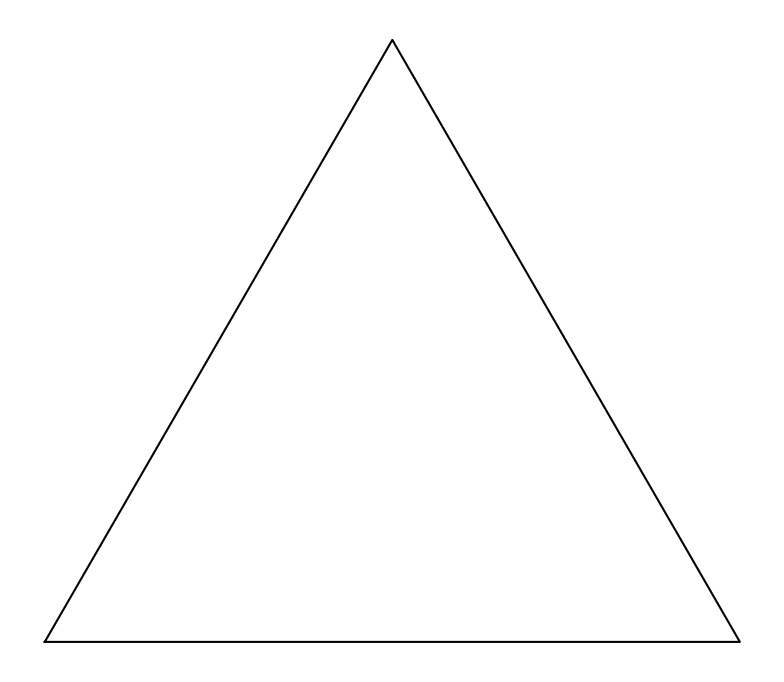

In [16]:
def draw_triangle(x, y, side):
    """
    Draw an equilateral triangle at (x,y) with side length `side`.

    Parameters:
    -----------
    x : float
        the x-coordinate of the *midpoint* of the triangle base
    y : float
        the y-coordinate of the *base* of the triangle
    side : float
        the length of each side of the triangle
    """
    height = np.sqrt(3)*side/2
    plt.plot([x-side/2.0, x+side/2.0, x, x-side/2.0], [y, y, y+height, y], 'k')


def show_triangles(save=False):
    """
    Make the Sierpinski triangle image look pretty.

    Parameters:
    -----------
    save : bool, optional
        Whether or not to save the image to a file (default: False).
    """
    plt.gcf().set_size_inches(10, 8.6)
    plt.axis('scaled')
    plt.axis('off')
    plt.tick_params(labelbottom=False, labelleft=False)
    if save:
        plt.tight_layout()
        plt.savefig('sierpinski.png')
    plt.show()

draw_triangle(0, 0, 1)  # example: a single triangle (depth=0)
show_triangles()        # show the triangle

Another example is given below: a Sierpinski triangle with depth 1, drawn without using recursion but just by calling `draw_triangles` 3 times. The point of this is that we provide you with (most of) the geometry, so you can focus on recursion and be less likely to get stuck on the geometry aspects.

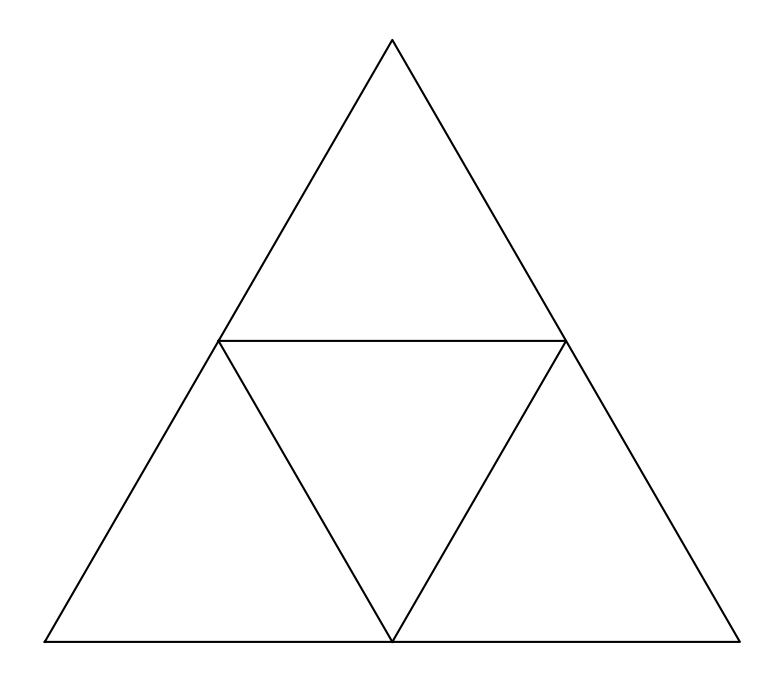

In [17]:
draw_triangle(-0.25, 0, 0.5)
draw_triangle(+0.25, 0, 0.5)
draw_triangle(0, (0.5*(np.sqrt(3)/2)), 0.5)
show_triangles()

Your tasks are as follows:

1. Write a recursive function `sierpinski` that takes four arguments: the coordinates `x` and `y`, the side length of the outermost triangle, `size`, and the depth `n`. Then, use your function to reproduce the figure above of the Sierpinski triangle with depth 6. Note: your code should only call `show_triangles` once, outside the recursive function (**not** within the recursive function)
2. Spend a few minutes contemplating how you would implement this without recursion. Once you have reached a sufficiently hopeless state of mind, record your thoughts here as part of your submission. 
3. What is the big-O running time of your code, as a function of $n$?

Note: the drawing could also be achieved by drawing one big right-side-up triangle followed up upside-down triangles inside, but here we're doing it by drawing all right-side-up triangles.

**Answer:**

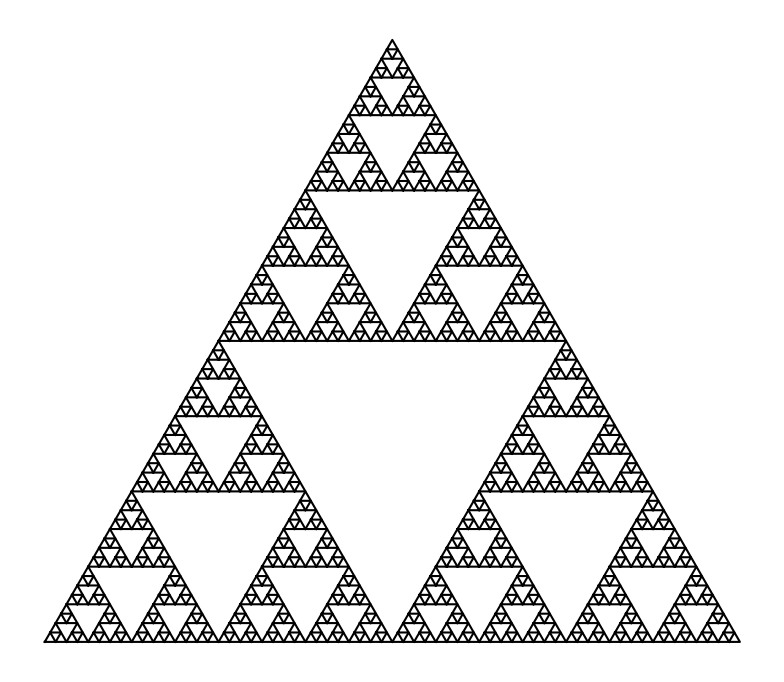

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def sierpinski(x, y, size, n):
    """
    Recursively draws Sierpinski triangles.

    Parameters:
    -----------
    x : float
        the x-coordinate of the *midpoint* of the base of the largest triangle
    y : float
        the y-coordinate of the *base* of the largest triangle
    size : float
        the side length of the outermost triangle
    n : int
        the depth of recursion
    """
    if n == 0:
        draw_triangle(x, y, size)
    else:
        height = np.sqrt(3) * size / 2
        # Draw the top triangle
        sierpinski(x, y + height / 2, size / 2, n - 1)
        # Draw the bottom left triangle
        sierpinski(x - size / 4, y, size / 2, n - 1)
        # Draw the bottom right triangle
        sierpinski(x + size / 4, y, size / 2, n - 1)

# Use the functions to draw a Sierpinski triangle of depth 6
plt.figure()
sierpinski(0, 0, 10, 6)
show_triangles()


In [19]:
!jupyter nbconvert _03-py-recursive-algorithms-practice-solutions.ipynb --to html --template classic --output 03-py-recursive-algorithms-practice-solutions.html

[NbConvertApp] Converting notebook _03-py-recursive-algorithms-practice-solutions.ipynb to html
[NbConvertApp] Writing 315564 bytes to 03-py-recursive-algorithms-practice-solutions.html


# <center>Have fun!<a class="tocSkip"></center>